#   EDA

In [70]:
import pandas as pd
import numpy as np
import calendar
from datetime import datetime
from matplotlib import dates as mpl_dates
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('NFT_Sales_Cleaned.csv')

In [5]:
df.head()

,Unnamed: 0,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales,Month,Day
0,1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0,Jun,23
1,2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0,Jun,24
2,3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0,Jun,25
3,4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0,Jun,26
4,5,2017-06-27,5296.23,100,44.0,0,33.0,52.96,2092.91,33.0,10.0,0.0,Jun,27


In [23]:
pd.pivot_table(df, index= ['Month', 'Day'], values='Number_of_Sales')

Number_of_Sales
Month Day                 
Apr   1            5638.25
      2            4111.00
      3            4739.75
      4            5949.75
      5            4468.50
...                    ...
Sep   26          11598.60
      27          14716.40
      28          10116.20
      29          11620.40
      30          15862.00

[366 rows x 1 columns]

In [26]:
df['Year'] = df['Date'].apply(lambda x: x.split('-')[0])
df['Year']=df['Year'].astype('int64')

In [29]:
df_pivot = pd.pivot_table(df, index= ['Year', 'Month', 'Day'], values='Number_of_Sales')
df_pivot

Number_of_Sales
Year Month Day                 
2017 Aug   1                2.0
           2                1.0
           3               21.0
           4                0.0
           5                2.0
...                         ...
2021 Sep   26           48119.0
           27           63076.0
           28           41912.0
           29           48830.0
           30           69618.0

[1596 rows x 1 columns]

In [42]:
df['Month_int'] = df['Date'].apply(lambda x: x.split('-')[1])
df['Month_int'] = df['Month_int'].astype('int64')
df.dtypes

Unnamed: 0                        int64
Date                             object
Sales_USD_cumsum                float64
Number_of_Sales_cumsum            int64
Active_Market_Wallets_cumsum    float64
Primary_Sales_cumsum              int64
Secondary_Sales_cumsum          float64
AverageUSD_cum                  float64
Sales_USD                       float64
Number_of_Sales                 float64
Active_Market_Wallets           float64
Primary_Sales                   float64
Month                            object
Day                               int64
Year                              int64
Month_int                         int64
dtype: object

In [45]:
df['Datetime'] = df.apply(lambda x: datetime(x['Year'],x['Month_int'],x['Day']), axis=1)
df.head()

,Unnamed: 0,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales,Month,Day,Year,Month_int,Datetime
0,1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0,Jun,23,2017,6,2017-06-23
1,2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0,Jun,24,2017,6,2017-06-24
2,3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0,Jun,25,2017,6,2017-06-25
3,4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0,Jun,26,2017,6,2017-06-26
4,5,2017-06-27,5296.23,100,44.0,0,33.0,52.96,2092.91,33.0,10.0,0.0,Jun,27,2017,6,2017-06-27



#### What month has the most sales?

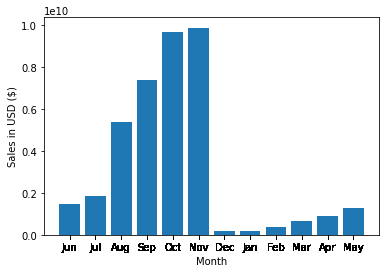

In [21]:
plt.bar(df['Month'], (df['Sales_USD_cumsum']).astype('int64'))
plt.xticks(df['Month'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()


#### What month has the most number of sales?

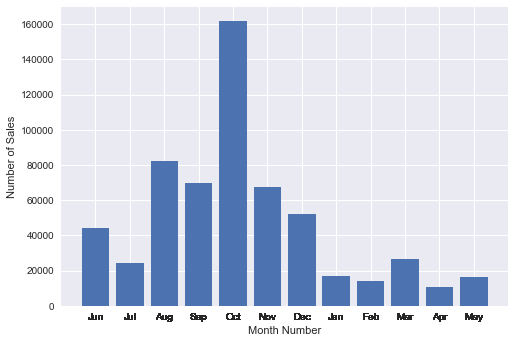

In [56]:
plt.bar(df['Month'], df['Number_of_Sales'])
plt.xticks(df['Month'])
plt.ylabel('Number of Sales')
plt.xlabel('Month Number')
plt.show()

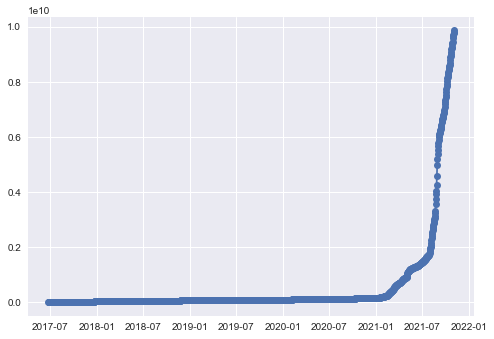

In [48]:
plt.style.use('seaborn')
plt.plot_date(df['Datetime'],df['Sales_USD_cumsum'], linestyle='solid')

In [55]:
plt.gcf().autofmt_xdate()
plt.show()

<Figure size 576x396 with 0 Axes>

In [60]:
data = pd.pivot_table(df, index= 'Datetime', values=['Number_of_Sales','Sales_USD_cumsum'])
data

,Number_of_Sales,Sales_USD_cumsum
Datetime,,
2017-06-23,19.0,1.020300e+03
2017-06-24,21.0,2.261140e+03
2017-06-25,13.0,2.778690e+03
2017-06-26,14.0,3.203320e+03
2017-06-27,33.0,5.296230e+03
...,...,...
2021-10-31,53472.0,9.651053e+09
2021-11-01,13646.0,9.686592e+09
2021-11-02,67388.0,9.769205e+09


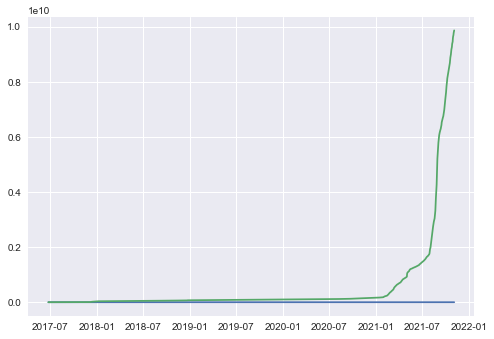

In [61]:
plt.plot(data)

In [73]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='NFT', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


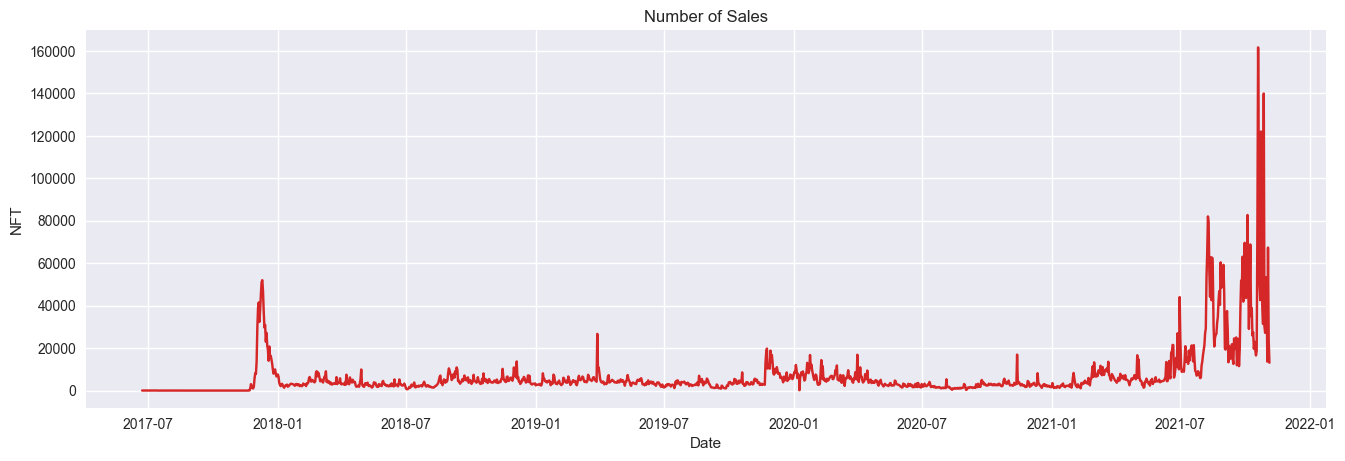

In [75]:
plot_df(df, x=df.Datetime, y=df.Number_of_Sales, title="Number of Sales")
#plt.plot(pd.pivot_table(df, index= 'Datetime', values=['Number_of_Sales']))

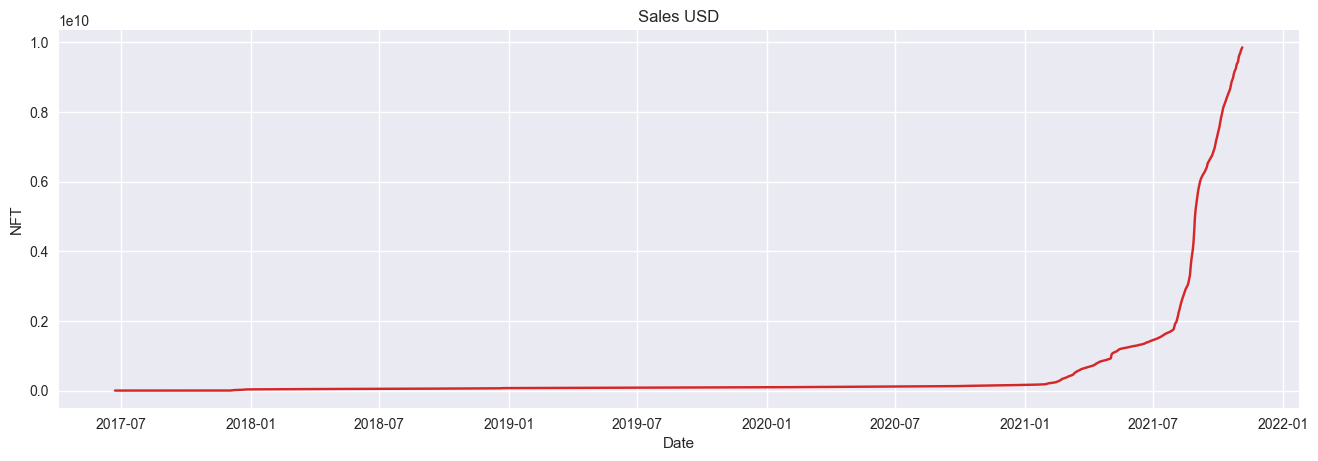

In [76]:
plot_df(df, x=df.Datetime, y=df.Sales_USD_cumsum, title="Sales USD")
#plt.plot(pd.pivot_table(df, index= 'Datetime', values=['Sales_USD_cumsum']))

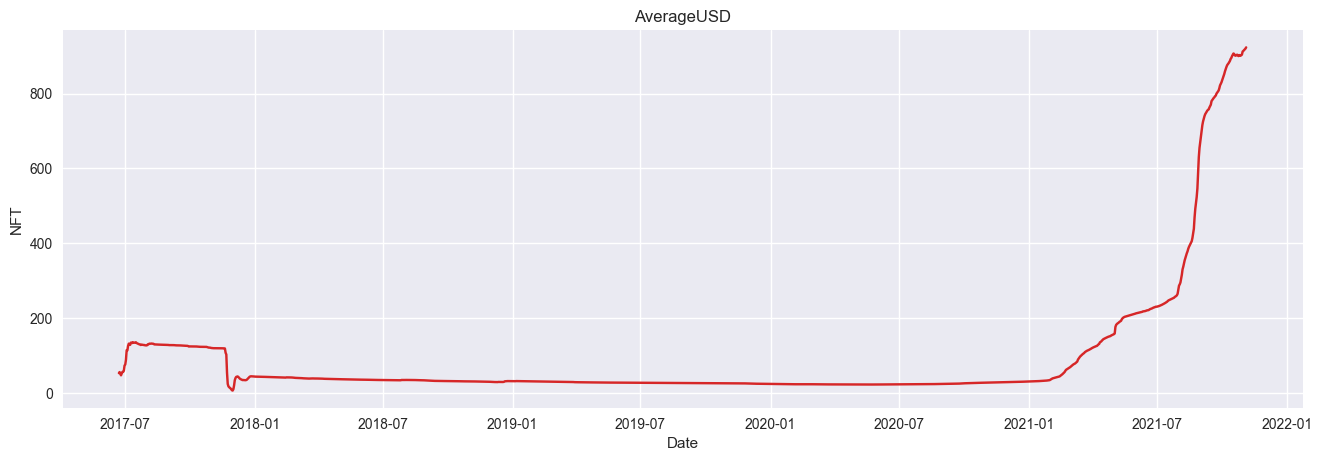

In [77]:
plot_df(df, x=df.Datetime, y=df.AverageUSD_cum, title="AverageUSD")
#plt.plot(pd.pivot_table(df, index= 'Datetime', values=['AverageUSD_cum']))

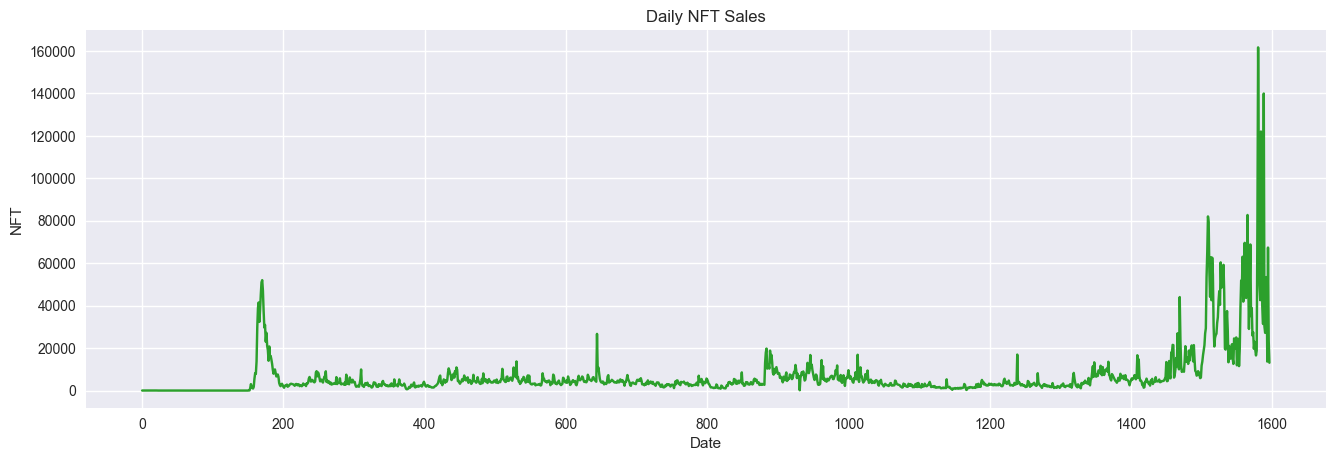

In [72]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df.index,df.Number_of_Sales, color='tab:green')
plt.gca().set(title='Daily NFT Sales', xlabel='Date', ylabel='NFT')
plt.show()